In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#ml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures #for Polynomial
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

#### Build linearRegreession model

#### Split Data

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [6]:
rg_model=LinearRegression()

In [7]:
rg_model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_predict=rg_model.predict(x_test)
y_predict

array([115818.88246628, -53410.40462428])

In [9]:
y_test

array([80000, 50000])

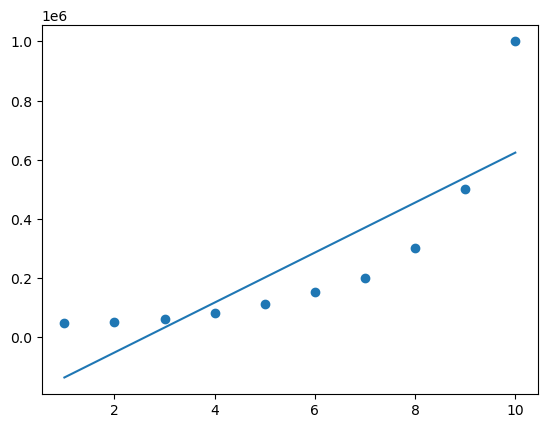

In [10]:
plt.scatter(x,y)
plt.plot(x,rg_model.predict(x))

In [11]:
r2_score(y_test ,y_predict)

-25.61489805708898

In [12]:
#polymonal for improve prediction
x_poly=PolynomialFeatures(degree=3)
new_x =x_poly.fit_transform(x)

In [13]:
xx_train,xx_test,yy_train,yy_test=train_test_split(new_x,y,test_size=.20)

In [14]:
poly_model=LinearRegression()
poly_model.fit(xx_train,yy_train)

LinearRegression()

In [15]:
yy_predict=poly_model.predict(xx_test)
yy_predict

array([163775.10345666, 114522.12147032])

In [16]:
yy_test

array([200000,  60000])

In [17]:
r2_score(yy_test ,yy_predict)

0.5627648102857394

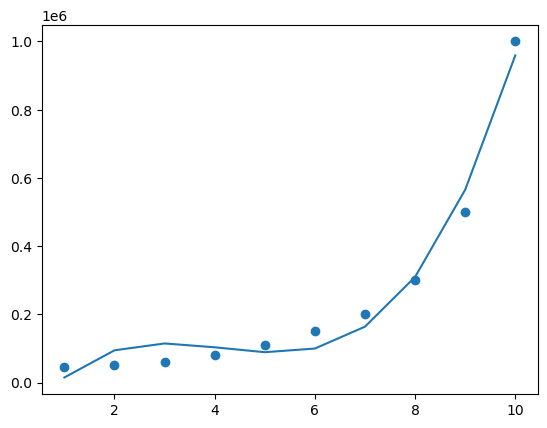

In [18]:
plt.scatter(x,y)
plt.plot(x,poly_model.predict(new_x))

### Try the same value on the 2 model

In [19]:
#with applay polyminominal on input value in thhe first
a=poly_model.predict(x_poly.fit_transform([[6]]))
a

array([99614.33345136])

In [20]:
#without applay polyminominal
b=rg_model.predict([[6]])
b

array([285048.16955684])